# Medical Image Classification
## Solution 1: Building a Convnet from Scratch

In this notebook, we will run a classifier model from scratch that is able to distinguish medical images.

1. Prepare the data & model hyperparameters
2. Explore the data & add augmentation
3. Build a small convnet from scratch to solve our classification problem
4. Evaluate training and validation accuracy

## Prepare data to classicfication classes, set Hyperparams

total Atelectasis images:        2015
total Cardiomegaly images:       464
total Consolidation images:      633
total Edema images:              310
total Effusion images:           1804
total Emphysema images:          461
total Fibrosis images:           366
total Hernia images:             53
total Infiltration images:       4640
total Mass images:               1043
total No_Finding images:         28000
total Nodule images:             1273
total Pleural_Thickening images: 525
total Pneumonia images:          161
total Pneumothorax images:       1099


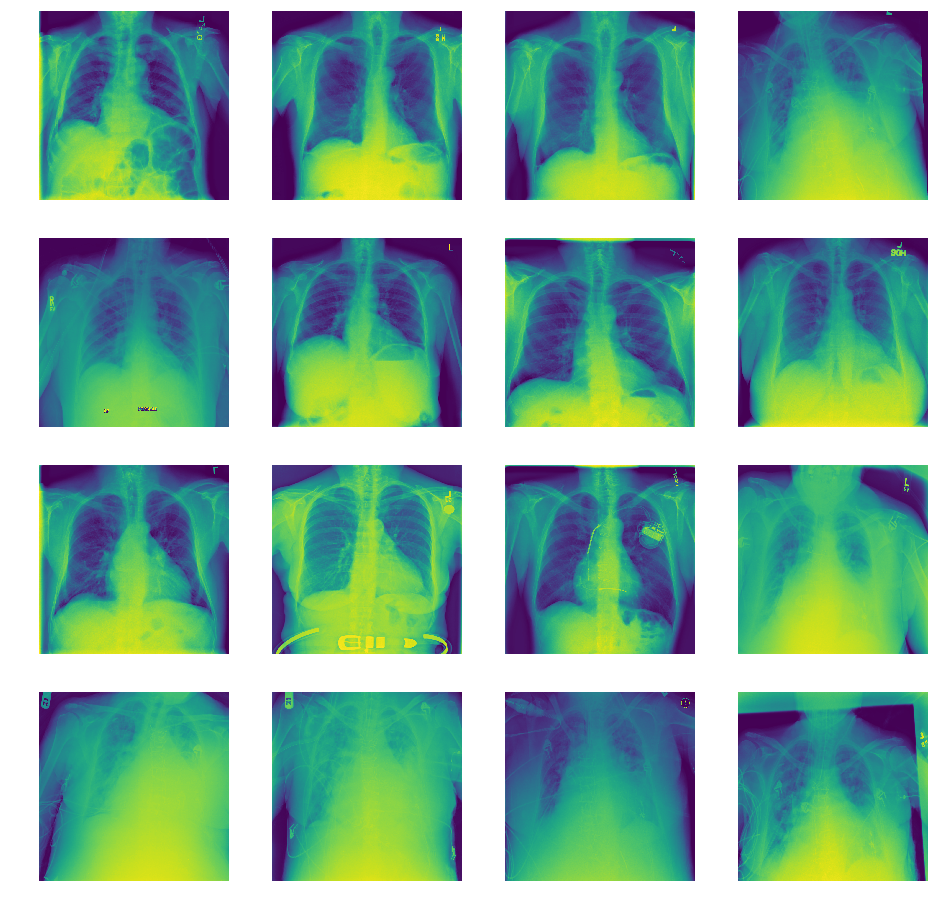

In [1]:
#base_dir = '/home/ente/Schreibtisch/2018 - 11 - sorted data'
base_dir = '/media/ente/M2/2018 - 11 - sorted data'
#base_dir = '/Users/mkunzmann/Desktop/2018 - 11 - sorted data'
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax' ]

#layers
pooling_window=2
conv_window=3
kernel_size=16
dense_units=2048 # Fully Connected Layers > exponentially increases parameter count
dropout= 0.25
activation = "relu"

#preprocessing
color_mode='grayscale'
color_channels = 1
zoom_range=0
validation_split = 0.2
target_width = target_height = 1024
target_size = (target_height, target_width)

#optimizer
lr = 0.3
verbose = 2
batch_size = 10
epochs = 75
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(lr=lr)
metrics=['categorical_accuracy']
loss='categorical_crossentropy'
class_mode = 'categorical'

import os
#class dirs
ate_dir = os.path.join(base_dir, class_names[0])
car_dir = os.path.join(base_dir, class_names[1])
con_dir = os.path.join(base_dir, class_names[2])
ede_dir = os.path.join(base_dir, class_names[3])
eff_dir = os.path.join(base_dir, class_names[4])
emp_dir = os.path.join(base_dir, class_names[5])
fib_dir = os.path.join(base_dir, class_names[6])
her_dir = os.path.join(base_dir, class_names[7])
inf_dir = os.path.join(base_dir, class_names[8])
mas_dir = os.path.join(base_dir, class_names[9])
nof_dir = os.path.join(base_dir, class_names[10])
nod_dir = os.path.join(base_dir, class_names[11])
ple_dir = os.path.join(base_dir, class_names[12])
pne_dir = os.path.join(base_dir, class_names[13])
pn2_dir = os.path.join(base_dir, class_names[14])
#filenames
ate_fnames = os.listdir(ate_dir)
car_fnames = os.listdir(car_dir)
con_fnames = os.listdir(con_dir)
ede_fnames = os.listdir(ede_dir)
eff_fnames = os.listdir(eff_dir)
emp_fnames = os.listdir(emp_dir)
fib_fnames = os.listdir(fib_dir)
her_fnames = os.listdir(her_dir)
inf_fnames = os.listdir(inf_dir)
mas_fnames = os.listdir(mas_dir)
nof_fnames = os.listdir(nof_dir)
nod_fnames = os.listdir(nod_dir)
ple_fnames = os.listdir(ple_dir)
pne_fnames = os.listdir(pne_dir)
pn2_fnames = os.listdir(pn2_dir)
#print (train_ate_fnames[:10])
#train_car_fnames.sort()

print ('total Atelectasis images:       ', len(os.listdir(ate_dir))) 
print ('total Cardiomegaly images:      ', len(os.listdir(car_dir))) 
print ('total Consolidation images:     ', len(os.listdir(con_dir))) 
print ('total Edema images:             ', len(os.listdir(ede_dir))) 
print ('total Effusion images:          ', len(os.listdir(eff_dir))) 
print ('total Emphysema images:         ', len(os.listdir(emp_dir))) 
print ('total Fibrosis images:          ', len(os.listdir(fib_dir))) 
print ('total Hernia images:            ', len(os.listdir(her_dir))) 
print ('total Infiltration images:      ', len(os.listdir(inf_dir))) 
print ('total Mass images:              ', len(os.listdir(mas_dir))) 
print ('total No_Finding images:        ', len(os.listdir(nof_dir))) 
print ('total Nodule images:            ', len(os.listdir(nod_dir))) 
print ('total Pleural_Thickening images:', len(os.listdir(ple_dir))) 
print ('total Pneumonia images:         ', len(os.listdir(pne_dir))) 
print ('total Pneumothorax images:      ', len(os.listdir(pn2_dir))) 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

# Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ate_pix = [os.path.join(ate_dir, fname) 
                for fname in ate_fnames[pic_index-8:pic_index]]
next_car_pix = [os.path.join(car_dir, fname) 
                for fname in car_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ate_pix+next_car_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Data Augmentation

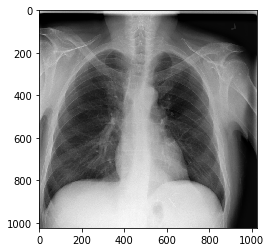

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=zoom_range,
    validation_split=validation_split) # set validation split

img_path = os.path.join(ate_dir, ate_fnames[316])
img = load_img(img_path, target_size=target_size)  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 1 == 0:
    break

## Build a small Convolutional Network

The images that will go into our convnet are 1024x1024 color images (in the next section on Data Preprocessing).

Let's code up the architecture. We will stack 5 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the following three extract 64, 2*64, 4*64 filters.

**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples (1,000), using just three convolutional modules keeps the model small, which lowers the risk of overfitting (which we'll explore in more depth in Exercise 2.)

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(target_width, target_height, color_channels))

# 5x convolution: 16 filters (growing each layer by factor two) that are 3x3, 
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(kernel_size, conv_window, activation=activation)(img_input)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(2*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(4*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(8*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(16*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(32*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(64*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

x = layers.Conv2D(129*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

# On top of it we stick two fully-connected layers. 
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(dense_units, activation=activation)(x)

# Add Droptout Regularization
x = layers.Dropout(dropout)(x)

# Create output layer with softmax activation
output = layers.Dense(len(class_names), activation = 'softmax') (x)

# output = input feature map + stacked convolution/maxpooling layers + fully connected layer + dropout + softmax output layer
model = Model(img_input, output)
model.summary()
model.compile(loss=loss,optimizer=optimizer, metrics=metrics)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024, 1024, 1)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1022, 1022, 16)    160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 511, 511, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 509, 509, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
__________

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Next, we'll configure the specifications for model training. We will train our model with the `categircal_crossentropy` loss, because it's a multi-class classification problem and our final activation is a softmax. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `Adam` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because Adam automates learning-rate tuning for us. (Other optimizers,such as RMSprop [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

### Apply Augmentation (Preprocessing)

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the [keras.preprocessing.image.ImageDataGenerator](https://keras.io/preprocessing/image/#flow_from_directory) class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [4]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode, 
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode, #Determines the type of label arrays that are returned:"categorical" will be 2D one-hot encoded labels,
    color_mode=color_mode, 
    subset='validation') # set as validation data

Found 34283 images belonging to 15 classes.
Found 8564 images belonging to 15 classes.


## Training
Let's train on all (42.862 / validation_split = training-images) images available, for 15 epochs, and validate on all validation images (This will take a couple of hours to run).

In [5]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/75
3428/3428 [==============================] - 705s 206ms/step - loss: 5.5895 - categorical_accuracy: 0.6530 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 2/75
3428/3428 [==============================] - 711s 207ms/step - loss: 5.5844 - categorical_accuracy: 0.6535 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 3/75
3428/3428 [==============================] - 694s 202ms/step - loss: 5.5884 - categorical_accuracy: 0.6533 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 4/75
3428/3428 [==============================] - 696s 203ms/step - loss: 5.5852 - categorical_accuracy: 0.6535 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 5/75
 560/3428 [===>..........................] - ETA: 7:40 - loss: 5.6586 - categorical_accuracy: 0.6489

StopIteration: float() argument must be a string or a number, not 'PngImageFile'

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
dir0 = [os.path.join(ate_dir, f) for f in ate_fnames]
dir1 = [os.path.join(car_dir, f) for f in car_fnames]
dir2 = [os.path.join(con_dir, f) for f in con_fnames]
dir3 = [os.path.join(ede_dir, f) for f in ede_fnames]
dir4 = [os.path.join(eff_dir, f) for f in eff_fnames]
dir5 = [os.path.join(emp_dir, f) for f in emp_fnames]
dir6 = [os.path.join(fib_dir, f) for f in fib_fnames]
dir7 = [os.path.join(her_dir, f) for f in her_fnames]
dir8 = [os.path.join(inf_dir, f) for f in inf_fnames]
dir9 = [os.path.join(mas_dir, f) for f in mas_fnames]
dir10 = [os.path.join(nof_dir, f) for f in nof_fnames]
dir11 = [os.path.join(nod_dir, f) for f in nod_fnames]
dir12 = [os.path.join(ple_dir, f) for f in ple_fnames]
dir13 = [os.path.join(pne_dir, f) for f in pne_fnames]
dir14 = [os.path.join(pn2_dir, f) for f in pn2_fnames]

img_path = random.choice(dir0+dir1+dir2+dir3+dir4+dir5+dir6+dir7+dir8+dir9+dir10+dir11+dir12+dir13+dir14)

img = load_img(img_path, target_size=target_size,color_mode = "grayscale")  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3) or grayscale: (150,150,1) 
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)or grayscale: (1,150,150,1) 
# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

In [ ]:
#Export results
print(acc)
print(val_acc)
print(loss)
print(val_loss)
#file=open('/Users/mkunzmann/Dropbox/THESIS/Code/Setup.txt','a')
#file.write(acc)
#file.write(val_acc)
#file.write(loss)
#file.write(val_loss)
#file.close()

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

import os, signal
os.kill(os.getpid(), signal.SIGKILL)